# TUGAS PRAKTIKUM

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,
    - Metode pra pengolahan
    - Pemilihan fitur
    - Arsitektur ANN
    - Fungsi Aktiviasi
    

- ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
AKURASI
- CONFUSION MATRIX
- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
# import library
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

c:\Users\shofiatul\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load Dataset

In [2]:
# Load dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#### Normalisasi data

In [3]:
# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Artitektur Model ANN

In [4]:
# Mendefinisikan model ANN
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Meratakan gambar 28x28 piksel menjadi vektor 1D
    layers.Dense(128, activation='relu'),  # Lapisan tersembunyi dengan 128 neuron dan aktivasi ReLU
    layers.Dropout(0.2),  # Lapisan dropout untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron untuk 10 kelas
])

In [5]:
# Mengompilasi model
model.compile(optimizer='adam', #mengoptimalkan proses pelatihan
              loss='sparse_categorical_crossentropy', # Memilih fungsi kerugian untuk masalah klasifikasi dengan banyak kelas.
              metrics=['accuracy']) #Menggunakan metrik akurasi untuk memantau kinerja

In [6]:
# Melatih model
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2939 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1393 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1053 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0849 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9821
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

Kode ini memulai proses pelatihan pada model jaringan saraf dengan menggunakan data latih dari dataset MNIST. Proses ini akan berlangsung selama 10 epoch, dan akan ada evaluasi pada data validasi setiap akhir epoch. 

#### Evaluasi Model 

In [7]:
# Mengevaluasi model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9799
Test accuracy: 0.9799000024795532


In [8]:
# Membuat prediksi
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


#### Confusion Matriks

In [9]:
# Membuat dan menampilkan matriks konfusi
cm = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[ 971    1    2    1    0    1    1    1    2    0]
 [   0 1127    3    0    0    0    2    1    2    0]
 [   4    1 1017    0    0    0    2    5    3    0]
 [   0    0    8  992    0    2    0    5    2    1]
 [   0    0    1    1  957    0   11    4    2    6]
 [   2    1    0   11    1  869    4    2    1    1]
 [   7    3    1    1    1    3  940    0    2    0]
 [   2    3   10    1    2    0    0 1003    1    6]
 [   1    0    4    4    4    3    1    4  950    3]
 [   4    5    0    4    8    2    1    9    3  973]]


Kode ini menghasilkan dan mencetak matriks  dari hasil prediksi model pada data uji.

#### Visualisasi Beberapa Prediksi

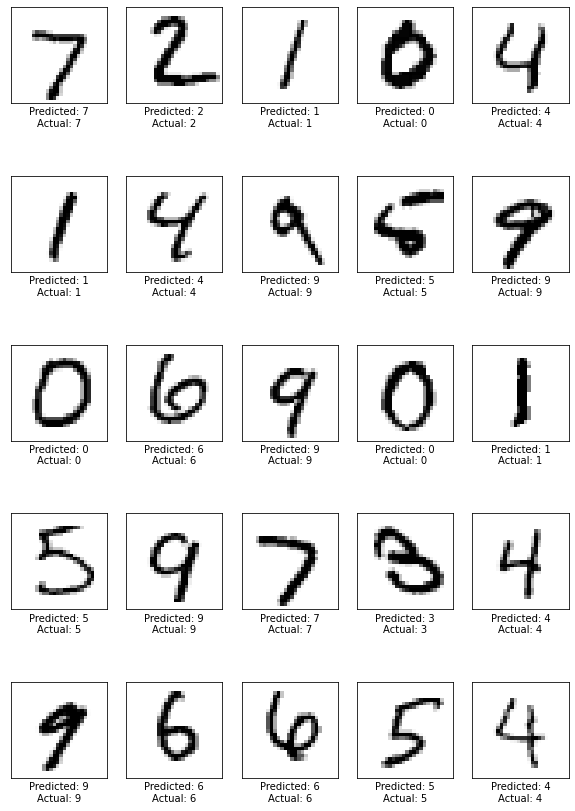

In [10]:
# Visualisasi beberapa prediksi
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}')
plt.show()